# Lab 3: Classification with Logistic Regression, KNN, and MLP on NSL-KDD Dataset

By Bilel RAHMOUNI

## 1. Download and Load the NSL-KDD Dataset:


Install Required Libraries:

In [ ]:
!pip install pandas

Download the NSL-KDD Dataset:

In [ ]:
# Download the dataset and unzip it
!wget https://github.com/defcom17/NSL_KDD/blob/master/KDDTrain+.txt?raw=true -O KDDTrain+.txt
!wget https://github.com/defcom17/NSL_KDD/blob/master/KDDTest+.txt?raw=true -O KDDTest+.txt


Define Column Names:

In [8]:
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
                "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]

Load the Data into a DataFrame:

In [10]:
import pandas as pd

# Load the NSL-KDD training and testing datasets with the correct column names
train_df = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
test_df = pd.read_csv('KDDTest+.txt', header=None, names=column_names)

# Check the first few rows to ensure data is loaded correctly
train_df.head()
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


### NSL-KDD Dataset Presentation

**Objective:**
The NSL-KDD dataset is an improved version of the original KDD Cup 1999 dataset, which was used for the competition on network intrusion detection systems (NIDS). The primary objective of this dataset is to detect various types of network intrusions and differentiate between normal and malicious activities.

The dataset is labeled with normal and attack types, including categories such as DOS (Denial of Service), R2L (Remote to Local), U2R (User to Root), and Probe attacks. It addresses some of the inherent issues in the original dataset, such as redundant records, which improves the evaluation of intrusion detection systems.

The dataset consists of 43 features, including network traffic attributes like duration, protocol type, service, and connection status flags. Each instance is labeled either as normal or as one of the several types of attacks.

**Main Features:**
- **duration**: Length of the connection in seconds.
- **protocol_type**: The type of protocol (e.g., TCP, UDP, ICMP).
- **service**: The service on the destination (e.g., HTTP, FTP, etc.).
- **src_bytes**: Number of data bytes from source to destination.
- **dst_bytes**: Number of data bytes from destination to source.
- **label**: The class of the instance, indicating either normal or a specific type of attack.


##  Data Preprocessing

#### 1. Label Encoding:

We'll convert the class labels into binary values (e.g., 0 for normal and 1 for anomaly).

First, we apply label encoding on the label column, for that we first inspect the unique labels in both datasets :

In [11]:
# Check the unique labels in the training and testing sets
train_labels = train_df['label'].unique()
test_labels = test_df['label'].unique()

# Print the unique labels in both datasets to compare
print("Unique labels in training set:", train_labels)
print("Unique labels in test set:", test_labels)

# Check for any unseen labels in the test set
unseen_labels = set(test_labels) - set(train_labels)
print("Unseen labels in test set:", unseen_labels)

Unique labels in training set: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']
Unique labels in test set: ['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']
Unseen labels in test set: {'xterm', 'named', 'xlock', 'xsnoop', 'udpstorm', 'saint', 'apache2', 'processtable', 'ps', 'sendmail', 'httptunnel', 'mailbomb', 'sqlattack', 'mscan', 'snmpgetattack', 'worm', 'snmpguess'}


At first, we convert Class Labels to Binary Values

In [12]:
# Convert labels to binary: 0 for normal, 1 for anomaly
train_df['label'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['label'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

# Verify the transformation
print(train_df['label'].unique())  # Should output [0, 1]
print(test_df['label'].unique())  # Should output [0, 1]

[0 1]
[1 0]


#### 2. Feature Scaling
Many machine learning models perform better when numerical features are scaled. We’ll use StandardScaler to standardize the feature columns.**bold text**

But we face categorical fetaures in the dataset such as 'protocol_type', 'service' and 'flag'; These features are string-based and need to be converted to numerical values before they can be scaled.

**One-Hot Encoding for the Categorical Variables**

In [14]:
# One-Hot Encode the categorical columns: 'protocol_type', 'service', 'flag'
X_train = pd.get_dummies(X_train, columns=['protocol_type', 'service', 'flag'])
X_test = pd.get_dummies(X_test, columns=['protocol_type', 'service', 'flag'])

# Ensure both train and test sets have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Verify the shape after One-Hot Encoding
print(X_train.shape)
print(X_test.shape)

(125973, 123)
(22544, 123)


**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few scaled rows to ensure it worked
print(pd.DataFrame(X_train_scaled).head())

        0         1         2         3         4         5         6    \
0 -0.110249 -0.007679 -0.004919 -0.014089 -0.089486 -0.007736 -0.095076   
1 -0.110249 -0.007737 -0.004919 -0.014089 -0.089486 -0.007736 -0.095076   
2 -0.110249 -0.007762 -0.004919 -0.014089 -0.089486 -0.007736 -0.095076   
3 -0.110249 -0.007723 -0.002891 -0.014089 -0.089486 -0.007736 -0.095076   
4 -0.110249 -0.007728 -0.004814 -0.014089 -0.089486 -0.007736 -0.095076   

        7         8         9    ...       113      114       115       116  \
0 -0.027023 -0.809262 -0.011664  ... -0.312889 -0.11205 -0.028606 -0.139982   
1 -0.027023 -0.809262 -0.011664  ... -0.312889 -0.11205 -0.028606 -0.139982   
2 -0.027023 -0.809262 -0.011664  ... -0.312889 -0.11205 -0.028606 -0.139982   
3 -0.027023  1.235694 -0.011664  ... -0.312889 -0.11205 -0.028606 -0.139982   
4 -0.027023  1.235694 -0.011664  ... -0.312889 -0.11205 -0.028606 -0.139982   

        117       118       119       120       121       122  
0 -0.61843

#### 3. Feature Selection

We can perform PCA to reduce the number of features while retaining most of the variance

In [16]:
from sklearn.decomposition import PCA

# Perform PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Apply PCA to both training and test datasets
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the new shape after PCA to see the reduced number of features
print(f"Reduced training set shape: {X_train_pca.shape}")
print(f"Reduced testing set shape: {X_test_pca.shape}")

Reduced training set shape: (125973, 90)
Reduced testing set shape: (22544, 90)


-> Training set reduced to 90 features

## Logistic Regression:

#### 1. Train the Logistic Regression Model on the Data

In [20]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the PCA-transformed training data
logreg_model.fit(X_train_pca, y_train)

# Model trained successfully
print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


#### 2. Make Predictions and Evaluate the Model

Once the model is trained, we will:

*   Make predictions on the PCA-transformed test set
*   Evaluate the performance of the model using accuracy, confusion matrix, and classification report (precision, recall, F1-score)

In [19]:
# Make predictions on the PCA-transformed test data
y_pred = logreg_model.predict(X_test_pca)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 84.62%
Confusion Matrix:
[[ 8909   802]
 [ 2666 10167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      9711
           1       0.93      0.79      0.85     12833

    accuracy                           0.85     22544
   macro avg       0.85      0.85      0.85     22544
weighted avg       0.86      0.85      0.85     22544





* True Negatives (TN): 8909 - Normal instances predicted as normal.
* False Positives (FP): 802 - Normal instances predicted as anomalies.
* False Negatives (FN): 2666 - Anomalies predicted as normal.
* True Positives (TP): 10167 - Anomalies predicted as anomalies.



##### 2.1 Visualizing the Confusion Matrix

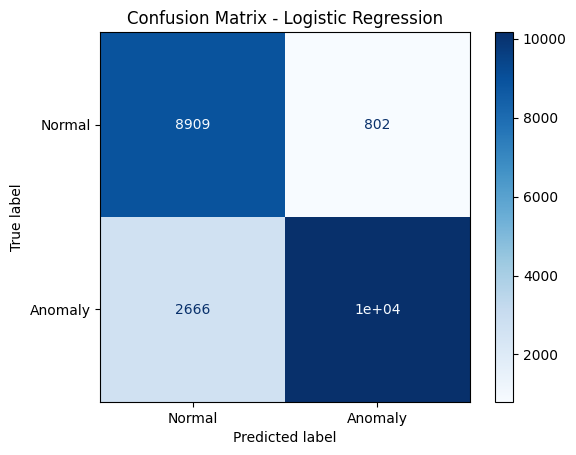

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg_model, X_test_pca, y_test, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Train the K-Nearest Neighbors (KNN) Model

#### 1. Training the KNN Model:

In [24]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change 'n_neighbors' to try different values

# Train the KNN model on the PCA-transformed training data
knn_model.fit(X_train_pca, y_train)

# Model trained successfully
print("K-Nearest Neighbors model trained successfully!")

K-Nearest Neighbors model trained successfully!


#### 2. Make Predictions and Evaluate the Model

In [25]:
# Make predictions on the PCA-transformed test data
y_pred_knn = knn_model.predict(X_test_pca)

# Evaluate the model
# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 80.86%
Confusion Matrix:
[[9335  376]
 [3938 8895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      9711
           1       0.96      0.69      0.80     12833

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544



* True Negatives (TN): 9335 - Normal instances correctly classified as normal.
* False Positives (FP): 376 - Normal instances incorrectly classified as anomalies.
* False Negatives (FN): 3938 - Anomalies incorrectly classified as normal.
* True Positives (TP): 8895 - Anomalies correctly classified as anomalies.

#### 2.1. Visualizing the Confusion Matrix

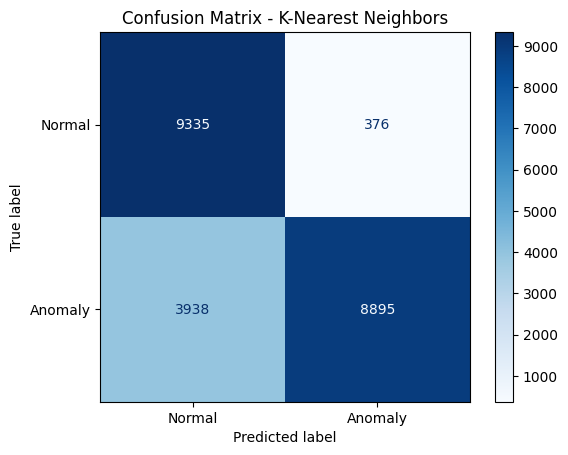

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_pca, y_test, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

## Multi-Layer Perceptron (MLP)

#### 1. Train the MLP Model:

In [27]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the MLP model on the PCA-transformed training data
mlp_model.fit(X_train_pca, y_train)

# Model trained successfully
print("Multi-Layer Perceptron model trained successfully!")

Multi-Layer Perceptron model trained successfully!


* hidden_layer_sizes=(100,): This creates one hidden layer with 100 neurons. We can try different sizes and numbers of layers.
* max_iter=300: This sets the maximum number of iterations (epochs) to allow the model to converge.
* random_state=42: Ensures reproducibility of the results.

#### 2. Make Predictions and Evaluate the Model

In [28]:
# Make predictions on the PCA-transformed test data
y_pred_mlp = mlp_model.predict(X_test_pca)

# Evaluate the model
# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy: {accuracy_mlp * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Accuracy: 84.76%
Confusion Matrix:
[[ 8971   740]
 [ 2696 10137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      9711
           1       0.93      0.79      0.86     12833

    accuracy                           0.85     22544
   macro avg       0.85      0.86      0.85     22544
weighted avg       0.86      0.85      0.85     22544



* True Negatives (TN): 8971 – Normal instances correctly classified as normal.
* False Positives (FP): 740 – Normal instances incorrectly classified as anomalies.
* False Negatives (FN): 2696 – Anomalies incorrectly classified as normal.
* True Positives (TP): 10137 – Anomalies correctly classified as anomalies.

#### 2.1. Visualizing the Confusion Matrix

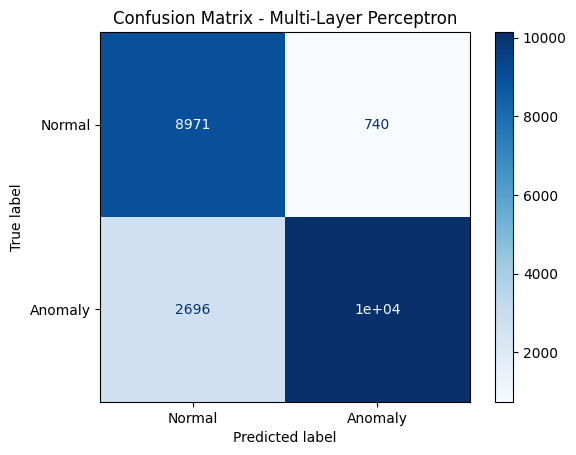

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test_pca, y_test, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Multi-Layer Perceptron')
plt.show()

## Model Comparison

#### 1. Compare Performance

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression Performance
print("=== Logistic Regression ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# K-Nearest Neighbors (KNN) Performance
print("\n=== K-Nearest Neighbors (KNN) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.2f}")

# Multi-Layer Perceptron (MLP) Performance
print("\n=== Multi-Layer Perceptron (MLP) ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_mlp):.2f}")

=== Logistic Regression ===
Accuracy: 0.85
Precision: 0.93
Recall: 0.79
F1-Score: 0.85

=== K-Nearest Neighbors (KNN) ===
Accuracy: 0.81
Precision: 0.96
Recall: 0.69
F1-Score: 0.80

=== Multi-Layer Perceptron (MLP) ===
Accuracy: 0.85
Precision: 0.93
Recall: 0.79
F1-Score: 0.86


#### 2. Confusion Matrix Comparison


=== Logistic Regression Confusion Matrix ===


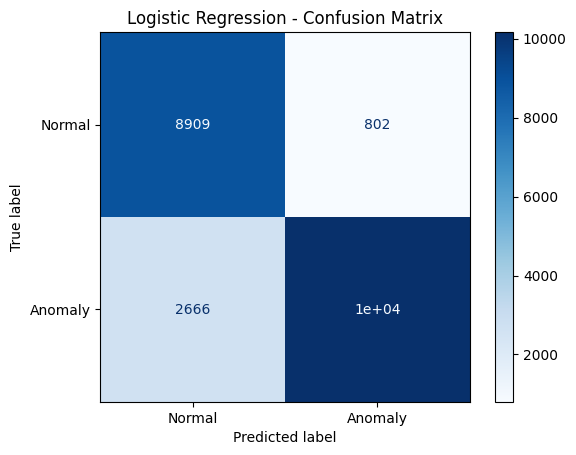


=== KNN Confusion Matrix ===


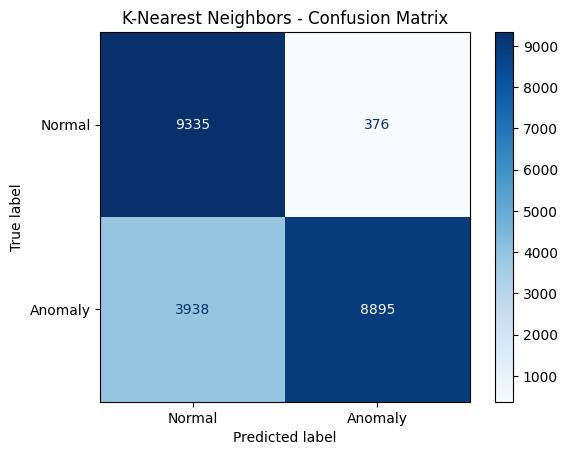


=== MLP Confusion Matrix ===


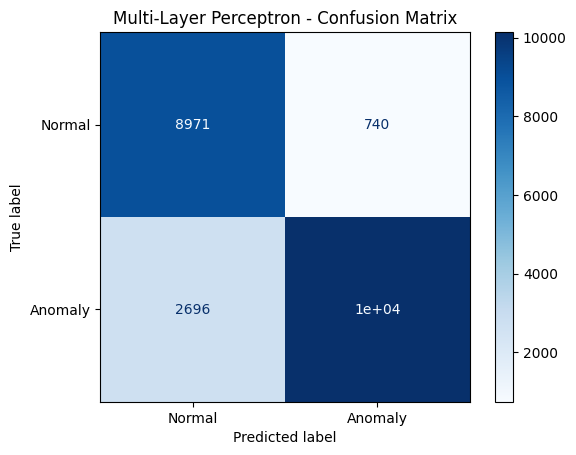

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression Confusion Matrix
print("\n=== Logistic Regression Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

# KNN Confusion Matrix
print("\n=== KNN Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.show()

# MLP Confusion Matrix
print("\n=== MLP Confusion Matrix ===")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, display_labels=["Normal", "Anomaly"], cmap=plt.cm.Blues)
plt.title('Multi-Layer Perceptron - Confusion Matrix')
plt.show()